<a href="https://colab.research.google.com/github/AnnaAkaten/Task/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%80%9C%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Новый раздел

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_excel('train.xlsx')
df.sort_values(by='Order Date')

,ID,Order Date,Class,Region,Sub-Category,Sales
9799,7981,2015-01-03,Стандарт,Урал,Paper,11726.470
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472
...,...,...,...,...,...,...
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610


In [81]:
r = df.groupby('Region').agg({'Sales':'sum'})
r['Percent'] = round(r/r.sum()* 100, 2)
r

,Sales,Percent
Region,,
Владивосток,"63,952,686.9",28.5
Калиниград,"71,930,299.7",32.0
Москва,"36,891,651.5",16.4
Урал,"51,858,587.7",23.1


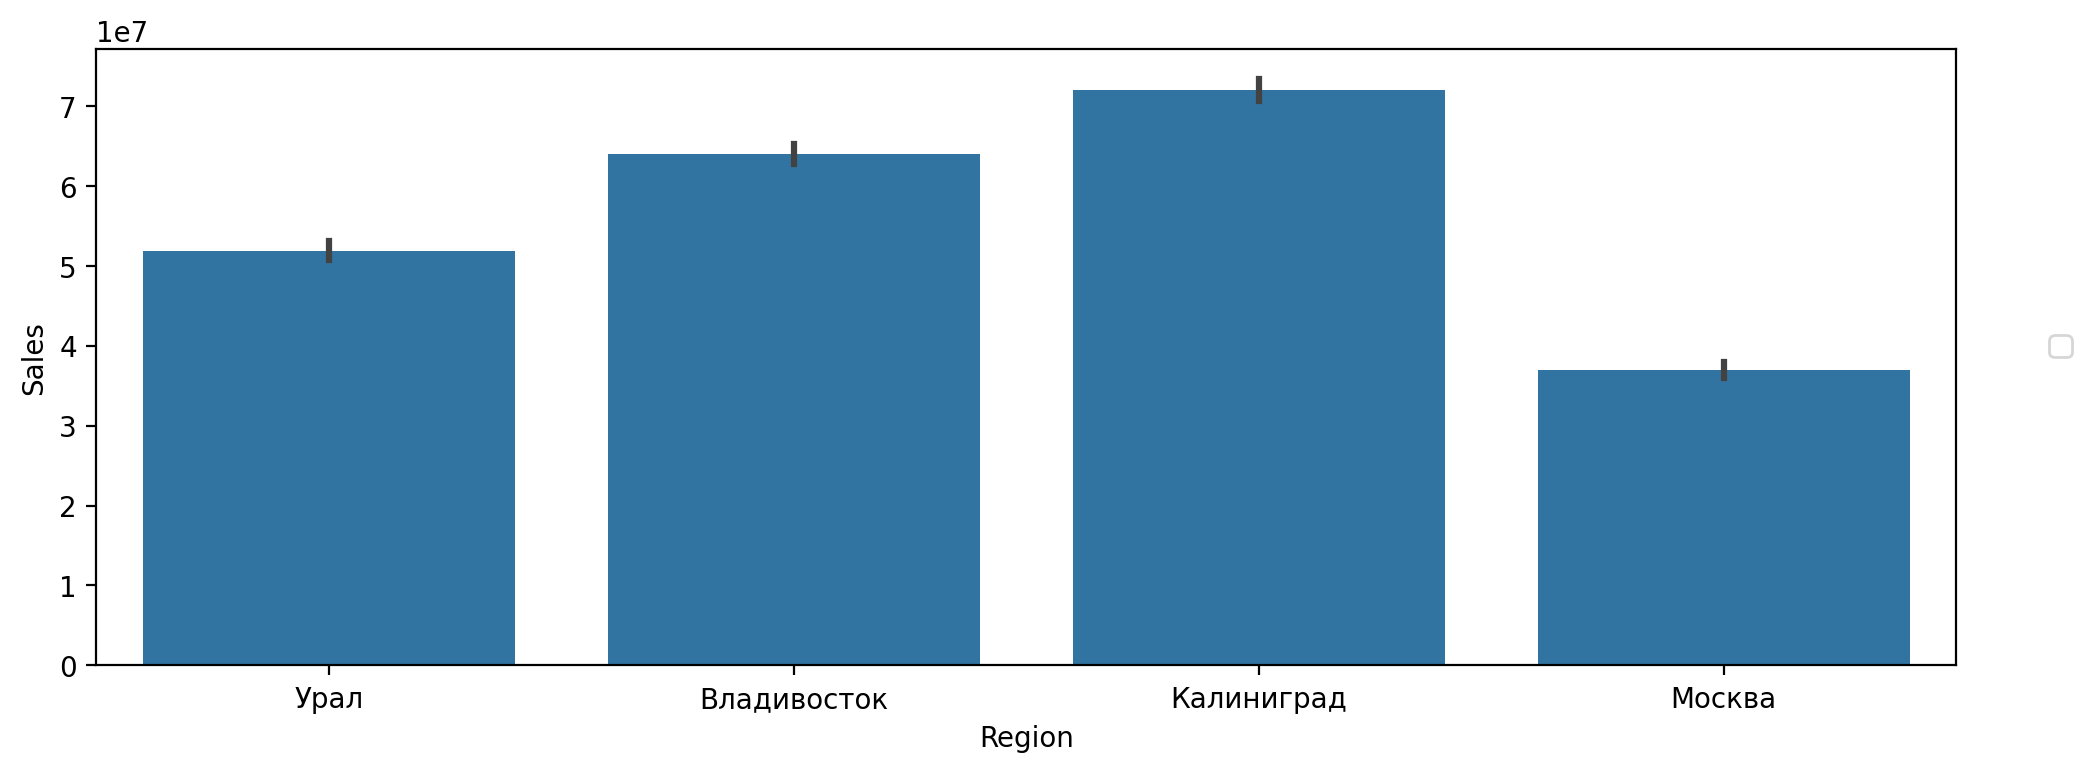

In [69]:
plt.figure(figsize=(12,4), dpi=200)
sns.barplot(data=df, x = 'Region', y = 'Sales', estimator='sum')
plt.legend(loc=(1.05, 0.5))


<Axes: ylabel='Percent'>

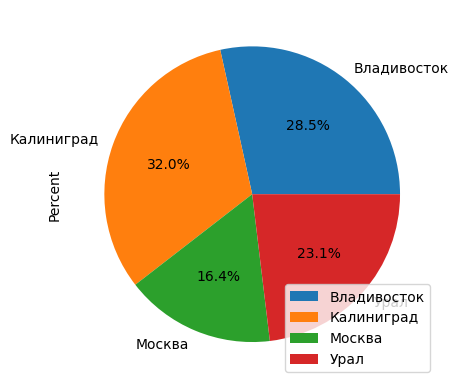

In [75]:
r.plot(kind='pie', y='Percent', autopct='%1.1f%%')

Наибольший объем продаж за исследуемый период  приходится на Калиниград(32%), наименьший показывает Москва(16,4%)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            9800 non-null   int64         
 1   Order Date    9800 non-null   datetime64[ns]
 2   Class         9800 non-null   object        
 3   Region        9800 non-null   object        
 4   Sub-Category  9800 non-null   object        
 5   Sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 459.5+ KB


In [4]:
df.shape

(9800, 6)

In [27]:
pd.options.display.float_format ='{:,.1f}'.format

In [28]:
df_sub_cat = df.groupby('Sub-Category').agg({'Sales':'sum'})
df_sub_cat['Percent'] = round(df_sub_cat/df_sub_cat.sum()* 100, 2)
df_sub_cat.sort_values(by='Sales', ascending=False).head(5)

<ipython-input-28-8840589eb4d8>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_sub_cat = df.groupby('Sub-Category').agg({'Sales':sum})


,Sales,Percent
Sub-Category,,
Binders,"33,911,974.3",15.1
Paper,"30,690,768.3",13.7
Furnishings,"21,565,066.0",9.6
Phones,"20,343,266.0",9.1
Storage,"18,892,804.2",8.4


Наибольший объем продаж за весь рассматриваемый период обеспечили такие катеории товаров как: Binders(15.1%), Paper(13,7 %), Furnishings(9,6%), Phones(9.1%). За последний год данная тенденция не изменилась, удельный вес рассматриваемых категорий менялся незначительно: рост спроса на данные категории увеличивается вместе с общим объемом продаж.

In [29]:
df_last_2 = df[df['Order Date'].dt.year.isin([2018, 2017])]
df_last_2 = df_last_2.groupby('Sub-Category').agg({'Sales':'sum'})
df_last_2['Percent'] = round(df_last_2/df_last_2.sum() * 100,2)
df_last_2.sort_values(by='Sales', ascending=False).head(5)


<ipython-input-29-34ed1a6d6515>:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_last_2 = df_last_2.groupby('Sub-Category').agg({'Sales':sum})


,Sales,Percent
Sub-Category,,
Binders,"20,332,043.2",15.3
Paper,"19,112,040.4",14.3
Furnishings,"12,594,092.0",9.4
Phones,"12,030,705.1",9.0
Storage,"11,282,761.2",8.5


In [30]:
df_last_1 = df[df['Order Date'].dt.year ==  2018]
df_last_1 = df_last_1.groupby('Sub-Category').agg({'Sales':'sum'})
df_last_1['Percent'] = round(df_last_1/df_last_1.sum() * 100,2)
df_last_1.sort_values(by='Sales', ascending=False).head(5)


<ipython-input-30-fd00119d8864>:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_last_1 = df_last_1.groupby('Sub-Category').agg({'Sales':sum})


,Sales,Percent
Sub-Category,,
Binders,"11,431,527.0",15.3
Paper,"10,616,645.2",14.2
Furnishings,"7,317,575.8",9.8
Phones,"6,730,458.2",9.0
Storage,"6,292,319.9",8.4


<Axes: >

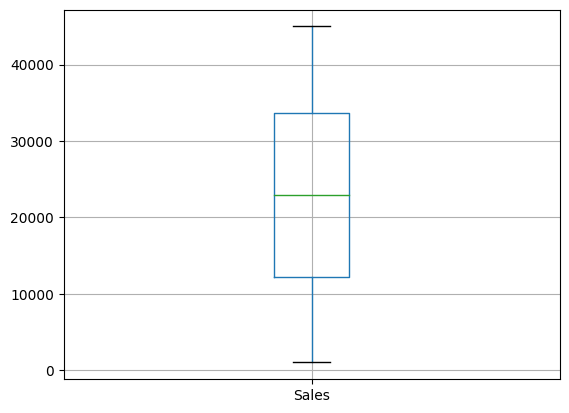

In [31]:
df.boxplot(column = ['Sales'])

<Axes: xlabel='Region', ylabel='Sales'>

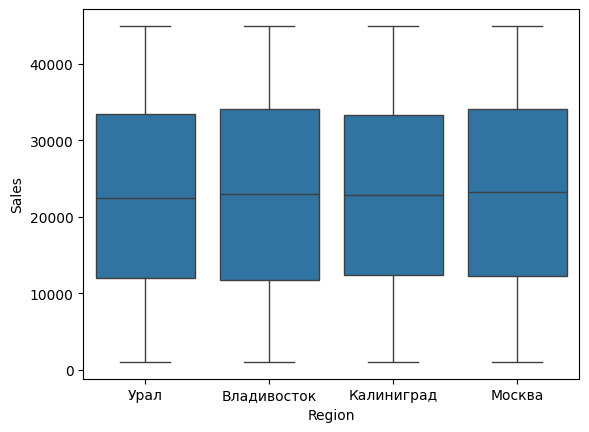

In [79]:
sns.boxplot(data = df, y= 'Sales', x='Region')

В срнднем медианное значение продаж по всех городах отличается незначтельно

In [33]:
df['Sales'].describe()

,Sales
count,"9,800.0"
mean,"22,921.8"
std,"12,602.0"
min,"1,002.8"
25%,"12,135.6"
50%,"22,882.1"
75%,"33,730.1"
max,"44,995.4"


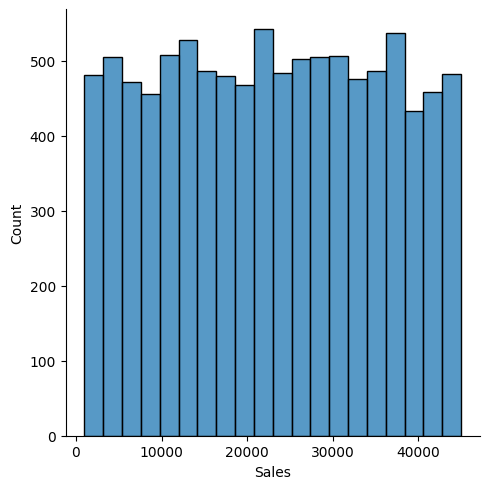

In [34]:
sns.displot(df['Sales'], bins = 20)

In [36]:
# нахождение гарницы методом интерквартильного размаха:
pr_25, pr_75 = np.percentile(df['Sales'], [25, 75])
IQR = pr_75 - pr_25
high_line= pr_75 + 1.5 * IQR
low_line = pr_25 - 1.5 * IQR


In [37]:
# нахождение гарницы методом 3 сигм:
std = np.std(df['Sales'])
mean = np.mean(df['Sales'])
high_line= mean + 3 * std
low_line = mean - 3 * std

df[(df['Sales'] < high_line) & (df['Sales'] > low_line)]

,ID,Order Date,Class,Region,Sub-Category,Sales,Sale_group
0,646,2018-12-30,Стандарт,Урал,Appliances,"37,229.1",Высокие
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,"20,994.6",Средние
2,908,2018-12-30,Стандарт,Владивосток,Phones,"42,133.9",Высокие
3,909,2018-12-30,Стандарт,Владивосток,Binders,"10,612.0",Маленькие
4,1297,2018-12-30,Стандарт,Калиниград,Binders,"28,781.1",Средние
...,...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,"8,639.5",Маленькие
9796,740,2015-01-04,Стандарт,Урал,Labels,"15,246.0",Маленькие
9797,741,2015-01-04,Стандарт,Урал,Storage,"20,415.8",Средние
9798,742,2015-01-04,Стандарт,Урал,Binders,"4,559.1",Маленькие


In [38]:
#определение границ интервалов для продаж
g0=df['Sales'].min()
g3 = df['Sales'].max()
delta = (g3-g0)/3
g1 = df['Sales'].min() + delta
g2 = g1 + delta


In [39]:
def sales_group(x):
  if g0<=x<g1:
    return 'Маленькие'
  elif g1<=x<g2:
    return 'Средние'
  elif g2<=x<=g3:
    return 'Высокие'


df['Sale_group'] = df['Sales'].apply(sales_group)
df

,ID,Order Date,Class,Region,Sub-Category,Sales,Sale_group
0,646,2018-12-30,Стандарт,Урал,Appliances,"37,229.1",Высокие
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,"20,994.6",Средние
2,908,2018-12-30,Стандарт,Владивосток,Phones,"42,133.9",Высокие
3,909,2018-12-30,Стандарт,Владивосток,Binders,"10,612.0",Маленькие
4,1297,2018-12-30,Стандарт,Калиниград,Binders,"28,781.1",Средние
...,...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,"8,639.5",Маленькие
9796,740,2015-01-04,Стандарт,Урал,Labels,"15,246.0",Маленькие
9797,741,2015-01-04,Стандарт,Урал,Storage,"20,415.8",Средние
9798,742,2015-01-04,Стандарт,Урал,Binders,"4,559.1",Маленькие


In [40]:
df_by_reg= df.groupby(['Region','Sale_group']).agg({"Sales": 'sum'})
df_by_reg

<ipython-input-40-f2ffd09f2446>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_by_reg= df.groupby(['Region','Sale_group']).agg({"Sales": sum})


Sales
Region      Sale_group             
Владивосток Высокие    35,449,521.7
            Маленькие   7,862,072.6
            Средние    20,641,092.6
Калиниград  Высокие    37,360,269.0
            Маленькие   8,889,168.1
            Средние    25,680,862.6
Москва      Высокие    19,955,694.1
            Маленькие   4,287,843.4
            Средние    12,648,114.1
Урал        Высокие    27,835,063.9
            Маленькие   6,434,909.8
            Средние    17,588,614.0

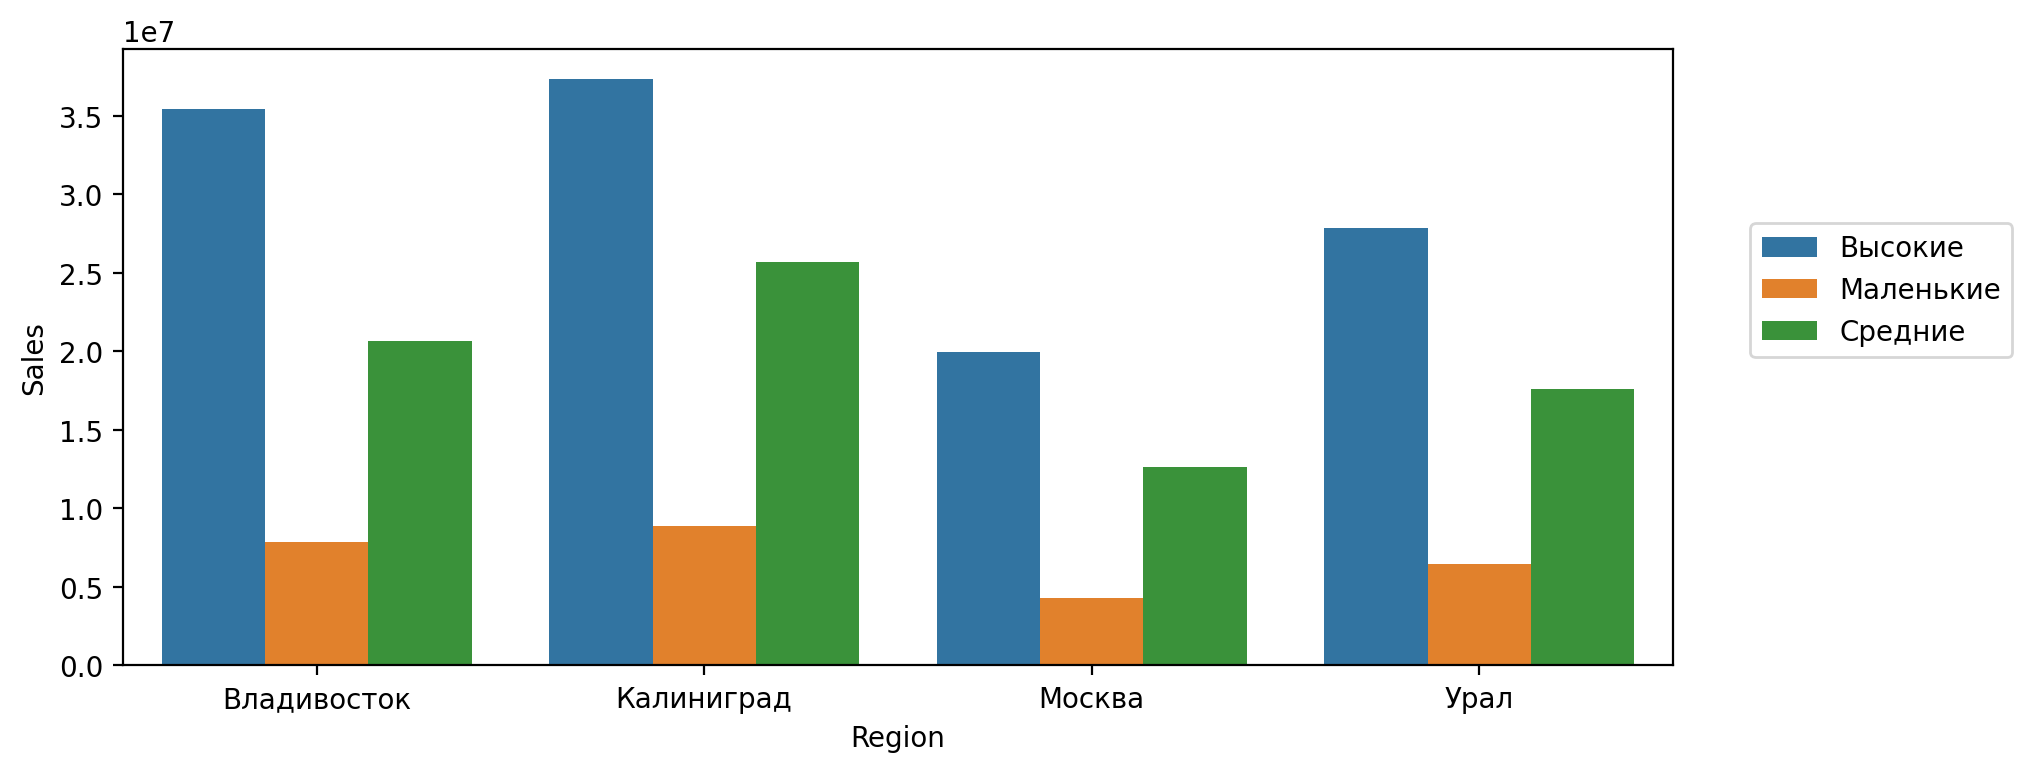

In [63]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=df_by_reg.reset_index(), x = 'Region', y = 'Sales', hue = 'Sale_group')
plt.legend(loc=(1.05, 0.5))


Наибольший объем продаж во всех исследуемых сегметах('Высокие, Маленькие и Средние') приходится на Калининград, следом за ним идет Владивосток. Москва демонстрирует наименьший объем продаж во всех категориях, что подстверждается стаистикой по общему объему продаж.
Общий объем продаж в Москве почти в 2 раза ниже чем в Калининграде.